In [11]:
import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [12]:
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "/home/local/KHQ/s.erattakulangara/Documents/HistomicsTK_EKS/dsa-run-custom-ai-models/debug/weights/mobile_sam.pt"

In [13]:
#install all the pip dependencies
#!pip install git+https://github.com/facebookresearch/segment-anything.git

In [14]:
#! pip install git+https://github.com/ChaoningZhang/MobileSAM.git

In [15]:
from mobile_sam import sam_model_registry, SamPredictor

model_type = "vit_t"
sam_checkpoint = CHECKPOINT_PATH

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()

Sam(
  (image_encoder): TinyViT(
    (patch_embed): PatchEmbed(
      (seq): Sequential(
        (0): Conv2d_BN(
          (c): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): GELU(approximate='none')
        (2): Conv2d_BN(
          (c): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
    (layers): ModuleList(
      (0): ConvLayer(
        (blocks): ModuleList(
          (0-1): 2 x MBConv(
            (conv1): Conv2d_BN(
              (c): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
            (act1): GELU(approximate='none')
            (conv2): Conv2d_BN(
 

(1000, 1000, 3)


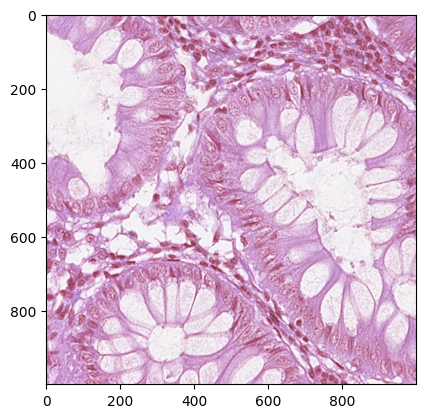

In [17]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/home/local/KHQ/s.erattakulangara/Documents/HistomicsTK_EKS/dsa-run-custom-ai-models/debug/workspace/test_12.png")
print(image.shape)
plt.imshow(image)

In [19]:
import numpy as np

predictor = SamPredictor(mobile_sam)
predictor.set_image(image)
input_point = np.array([[900,250]])
input_label = np.array([1])

masks, scores, logits = predictor.predict(
    point_coords = input_point,
    point_labels = input_label,
    multimask_output = False
)

In [20]:
masks.shape, type(masks.astype('uint8'))

((1, 1000, 1000), numpy.ndarray)

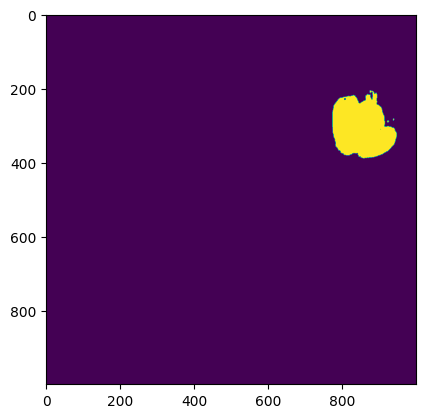

In [21]:
import matplotlib.pyplot as plt
plt.imshow(masks[0])

In [ ]:
contours, _ = cv2.findContours(masks[0].astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#select the largest contours
largest_contour = max(contours, key = cv2.contourArea)
output_list = [[[x[1], x[0], 0]
                            for x in arr] for arr in list(largest_contour)]
#print('output', type(output_list), output_list, contours)